<a href="https://colab.research.google.com/github/sai-srinivas91/Machine-Learning/blob/main/Data_Analysis_of_Youtube_Channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [ ]:
api_key='My Youtube API key'

In [ ]:
channel_id= ['UCqkQzjePM64LtMOWzShh_SQ',]

In [ ]:
api_service_name = "youtube"
api_version = "v3"


# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [ ]:
request= youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id=','.join(channel_id)
  )
response= request.execute()

JSON(response)

<IPython.core.display.JSON object>

In [ ]:
def get_channel_stats(youtube, channel_id):
  all_data=[]

  request= youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id=','.join(channel_id)
  )
  response= request.execute()

  for item in response['items']:
    data= {'channelName':item['snippet']['title'],
           'subscribers': item['statistics']['subscriberCount'],
           'views':item['statistics']['viewCount'],
           'totalViews': item['statistics']['videoCount'],
           'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
    }

    all_data.append(data)

  return(pd.DataFrame(all_data))

In [ ]:
channel_stats= get_channel_stats(youtube, channel_id)

In [ ]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Filmy Geeks,365000,68755472,416,UUqkQzjePM64LtMOWzShh_SQ


In [ ]:
request = youtube.playlistItems().list(
  part="snippet,contentDetails",
  id=','.join(channel_id)
)
response = request.execute()

print(response)

{'kind': 'youtube#playlistItemListResponse', 'etag': 'YIUPVpqNjppyCWOZfL-19bLb7uk', 'items': [], 'pageInfo': {'totalResults': 0, 'resultsPerPage': 0}}


In [ ]:
playlist_id= 'UUqkQzjePM64LtMOWzShh_SQ'
def get_video_ids(youtube, playlist_id):
   
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [ ]:
video_ids= get_video_ids(youtube,playlist_id)

In [ ]:
len(video_ids)

417

In [ ]:
def get_video_details(youtube, video_ids):
  all_videos_info= []

  for i in range(0,len(video_ids),50):
    request=youtube.videos().list(part='snippet,contentDetails,Statistics',id=','.join(video_ids[i:i+50]))

    response= request.execute()

    for video in response['items']:
      stats_to_keep= { 'snippet':['channelTitle','title','description','tags','publishedAt'],
                      'statistics':['viewCount','likeCount','favouriteCount','commentCount'],
                      'contentDetails':['duration','definition','caption']
                      }

      video_info={}
      video_info['video_id']=video['id']

      for k in stats_to_keep.keys():
        for v in stats_to_keep[k]:
          try:
            video_info[v]=video[k][v]
          except:
            video_info[v]=None

      all_videos_info.append(video_info)

  return pd.DataFrame(all_videos_info)


In [ ]:
video_df= get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,-_2fYrwinVA,Filmy Geeks,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,"[Everything Everywhere All at Once, Everything...",2023-02-19T13:58:55Z,20349,1037,None,101,PT16M32S,hd,false
1,kUwWNPx2GnY,Filmy Geeks,"పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...","పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...","[sukumar, k viswanath, pushpa 2]",2023-02-16T03:24:05Z,10292,720,None,16,PT44S,hd,false
2,mrPR_VZ354I,Filmy Geeks,Greatest Mass Moments Created By Legend K Visw...,Greatest Mass Moments Created By Legend K Visw...,[Greatest Mass Moments Created By Legend K Vis...,2023-02-14T11:21:38Z,15830,1049,None,95,PT8M42S,hd,false
3,vyCOsI7EuGU,Filmy Geeks,Understanding 'Mukundan Unni' In Telugu | Why ...,#disneyplushotstar #mukundanunniassociates \nC...,"[Mukundan Unni Associates, disney+hotstar, muk...",2023-02-09T12:21:27Z,16377,930,None,123,PT8M19S,hd,false
4,-K9k7Mm3uNk,Filmy Geeks,What Makes 'MASS' Movie Great? | Dasara | Kant...,What Makes 'MASS' Movie Great? | Dasara | Kant...,"[what makes mass movie great, dasara, kantara,...",2023-02-06T12:10:29Z,29341,1661,None,294,PT9M5S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,BPsVPhb-FDg,Filmy Geeks,7 Best Krishna vamsi movies | Best films of Kr...,7 Best Krishna vamsi movies | Best films of Kr...,"[krishna vamsi movies, choreographer rakesh ma...",2018-02-28T13:54:49Z,22781,979,None,148,PT4M17S,hd,false
413,fg_zf_j12pc,Filmy Geeks,A Tribute to Sridevi | Remarkable films of Sri...,A Tribute to Sridevi | Remarkable films of Sri...,"[a tribute to sridevi, telugu films, telugu mo...",2018-02-27T04:32:54Z,4877,123,None,19,PT4M10S,hd,false
414,B5NpnJT3bpw,Filmy Geeks,6 Hollywood Films that will INSPIRE you | Insp...,6 Hollywood Films that will INSPIRE you | Insp...,"[inspirational hollywood films, 6 hollywood fi...",2018-02-22T12:14:24Z,71374,2759,None,307,PT6M42S,hd,false
415,v7lvAVAnH1E,Filmy Geeks,9 Reasons why you should watch AWE movie | Tel...,9 Reasons why you should watch AWE movie |Telu...,"[awe movie review, 9 reasons why you should wa...",2018-02-21T10:15:46Z,28266,775,None,70,PT4M27S,hd,false


In [ ]:
def get_comments(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)

In [ ]:
comments_df= get_comments(youtube, video_ids)
comments_df

Could not get comments for video GtZz72KEvNQ


,video_id,comments
0,-_2fYrwinVA,[oscar vache cinema anipistundi... meeremantar...
1,kUwWNPx2GnY,"[రంగస్థలం మూవీ గురించి ఒక వీడియో చెయ్ బ్రో, రం..."
2,mrPR_VZ354I,"[విశ్వనాధ్ గారి సినిమాల్లో మీకిష్టమైన సీన్?, U..."
3,vyCOsI7EuGU,"[mukundan meeku enduku nachadu? or nachaledu?,..."
4,-K9k7Mm3uNk,"[meeku nachina “manchi” mass cinemalenti ?, Si..."
...,...,...
411,BPsVPhb-FDg,"[Murari is all time favourite, Mahesh Babu gar..."
412,fg_zf_j12pc,[Moondram pirai film..Kamal Hassan sir sridevi...
413,B5NpnJT3bpw,"[Came here to see after Telugu Geeks face off,..."
414,v7lvAVAnH1E,[Claimax lo nijamgaa awe anipinchindi... Almos...


In [ ]:
comments_df['comments'][0]

['oscar vache cinema anipistundi... meeremantaru?',
 'Telugu lo vunda',
 'బొక్కల ఉంది సినిమా ఇప్పుడే చూసా టైమ్ వెస్ట్ frds ఏదైనా చుస్తే మనకి ఏదో ఒకటి నేర్పాలి కానీ ఇదీ నేర్చుకున్నది పోతుంది',
 'I think great concept and unique philosophical ideas were wasted through this kind of presentation,, .',
 'If Nolan  made a cringe film,, then it would be everything everywhere all at Once.',
 'Nuv cheppinantha scene ledhu broh',
 'Nee. 4 years nundi me subscriber ni. Ne adigindanikosam osari alochinchadi',
 'Meeru kachithanga( sembi ) movie kosam cheppali. Ledante meku ne pedda abimanini kaneesam short video pettandi assalu ne nammalekapoyanadi amovie lo creat chesina sanni veshalu',
 'అన్నా నువ్వు రచయితవే కాబట్టి తెలుగు పదాల్ని ఎక్కువ చేర్చు  కొంచెం ఇంగ్లీష్  పదాలు అర్థం కావట్లేదు',
 'Bhayya..Ah OTT platform lo undi movie?']

# Data Preprocessing

In [ ]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [ ]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [ ]:
video_df.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption'],
      dtype='object')

In [ ]:
video_df.columns= video_df.columns.str.lower()

In [ ]:
video_df.columns

Index(['video_id', 'channeltitle', 'title', 'description', 'tags',
       'publishedat', 'viewcount', 'likecount', 'favouritecount',
       'commentcount', 'duration', 'definition', 'caption'],
      dtype='object')

In [ ]:
#Changing dtype of 'viewcount','likecount','commentcount'
numeric_cols= ['viewcount','likecount','commentcount']
video_df[numeric_cols]= video_df[numeric_cols].apply(pd.to_numeric,errors='coerce',axis=1)

In [ ]:
#Published Date into Day
from dateutil import parser
video_df['publishedat'] = video_df['publishedat'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedat'].apply(lambda x: x.strftime("%A"))

In [ ]:
!pip install isodate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.0 MB/s eta 0:00:00


In [ ]:
from isodate import parse_duration

video_df['durationSecs']= video_df['duration'].apply(lambda x: parse_duration(x))
video_df['durationSecs']=video_df['durationSecs'].astype('timedelta64[s]')

In [ ]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,992.0,PT16M32S
1,44.0,PT44S
2,522.0,PT8M42S
3,499.0,PT8M19S
4,545.0,PT9M5S
...,...,...
412,257.0,PT4M17S
413,250.0,PT4M10S
414,402.0,PT6M42S
415,267.0,PT4M27S


In [ ]:
#Adding Tag count

video_df['tagcount']= video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df[['tags','tagcount']]

,tags,tagcount
0,"[Everything Everywhere All at Once, Everything...",4
1,"[sukumar, k viswanath, pushpa 2]",3
2,[Greatest Mass Moments Created By Legend K Vis...,5
3,"[Mukundan Unni Associates, disney+hotstar, muk...",3
4,"[what makes mass movie great, dasara, kantara,...",4
...,...,...
412,"[krishna vamsi movies, choreographer rakesh ma...",12
413,"[a tribute to sridevi, telugu films, telugu mo...",10
414,"[inspirational hollywood films, 6 hollywood fi...",7
415,"[awe movie review, 9 reasons why you should wa...",7


In [ ]:
video_df.head()

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,favouritecount,commentcount,duration,definition,caption,publishDayName,durationSecs,tagcount
0,-_2fYrwinVA,Filmy Geeks,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,"[Everything Everywhere All at Once, Everything...",2023-02-19 13:58:55+00:00,20349,1037,None,101,PT16M32S,hd,false,Sunday,992.0,4
1,kUwWNPx2GnY,Filmy Geeks,"పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...","పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...","[sukumar, k viswanath, pushpa 2]",2023-02-16 03:24:05+00:00,10292,720,None,16,PT44S,hd,false,Thursday,44.0,3
2,mrPR_VZ354I,Filmy Geeks,Greatest Mass Moments Created By Legend K Visw...,Greatest Mass Moments Created By Legend K Visw...,[Greatest Mass Moments Created By Legend K Vis...,2023-02-14 11:21:38+00:00,15830,1049,None,95,PT8M42S,hd,false,Tuesday,522.0,5
3,vyCOsI7EuGU,Filmy Geeks,Understanding 'Mukundan Unni' In Telugu | Why ...,#disneyplushotstar #mukundanunniassociates \nC...,"[Mukundan Unni Associates, disney+hotstar, muk...",2023-02-09 12:21:27+00:00,16377,930,None,123,PT8M19S,hd,false,Thursday,499.0,3
4,-K9k7Mm3uNk,Filmy Geeks,What Makes 'MASS' Movie Great? | Dasara | Kant...,What Makes 'MASS' Movie Great? | Dasara | Kant...,"[what makes mass movie great, dasara, kantara,...",2023-02-06 12:10:29+00:00,29341,1661,None,294,PT9M5S,hd,false,Monday,545.0,4


In [ ]:
video_df.dtypes

video_id                             object
channeltitle                         object
title                                object
description                          object
tags                                 object
publishedat       datetime64[ns, tzlocal()]
viewcount                             int64
likecount                             int64
favouritecount                       object
commentcount                          int64
duration                             object
definition                           object
caption                              object
publishDayName                       object
durationSecs                        float64
tagcount                              int64
dtype: object

In [ ]:
video_df.columns

Index(['video_id', 'channeltitle', 'title', 'description', 'tags',
       'publishedat', 'viewcount', 'likecount', 'favouritecount',
       'commentcount', 'duration', 'definition', 'caption', 'publishDayName',
       'durationSecs', 'tagcount'],
      dtype='object')

In [ ]:
video_df.definition.unique()

array(['hd', 'sd'], dtype=object)

In [ ]:
final_df= video_df.drop(['video_id','channeltitle','description','tags','publishedat','caption','favouritecount','duration','definition'],axis=1)

In [ ]:
final_df.head()

,title,viewcount,likecount,commentcount,publishDayName,durationSecs,tagcount
0,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,20349,1037,101,Sunday,992.0,4
1,"పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...",10292,720,16,Thursday,44.0,3
2,Greatest Mass Moments Created By Legend K Visw...,15830,1049,95,Tuesday,522.0,5
3,Understanding 'Mukundan Unni' In Telugu | Why ...,16377,930,123,Thursday,499.0,3
4,What Makes 'MASS' Movie Great? | Dasara | Kant...,29341,1661,294,Monday,545.0,4


In [ ]:
final_df.title[0]

'ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everything Everywhere All at Once In Telugu | Filmy Geeks'

In [ ]:
df= final_df.copy()

In [ ]:
import string

english_and_spaces= set(string.ascii_letters + string.punctuation + '¿¡ '+string.digits)

df['modified_title']= df['title'].apply(lambda x: ''.join((c for c in x if c in english_and_spaces)))
df['modified_title'] = df['modified_title'].str.replace('| Filmy Geeks', '', regex=True)
df['modified_title'] = df['modified_title'].str.strip()

In [ ]:
df['modified_title'][0]

'| Everything Everywhere All at Once In Telugu |'

In [ ]:
df.head()

,title,viewcount,likecount,commentcount,publishDayName,durationSecs,tagcount,modified_title
0,ఈ మధ్య కాలంలో ఇలాంటి సినిమా చూసుండరు | Everyth...,20349,1037,101,Sunday,992.0,4,| Everything Everywhere All at Once In Telugu |
1,"పవిత్రమైన పూనకాలు, తెప్పించే సినిమాలు.. మహానుభ...",10292,720,16,Thursday,44.0,3,", .."
2,Greatest Mass Moments Created By Legend K Visw...,15830,1049,95,Tuesday,522.0,5,Greatest Mass Moments Created By Legend K Visw...
3,Understanding 'Mukundan Unni' In Telugu | Why ...,16377,930,123,Thursday,499.0,3,Understanding 'Mukundan Unni' In Telugu | Why ...
4,What Makes 'MASS' Movie Great? | Dasara | Kant...,29341,1661,294,Monday,545.0,4,What Makes 'MASS' Movie Great? | Dasara | Kant...


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Best Performing Videos

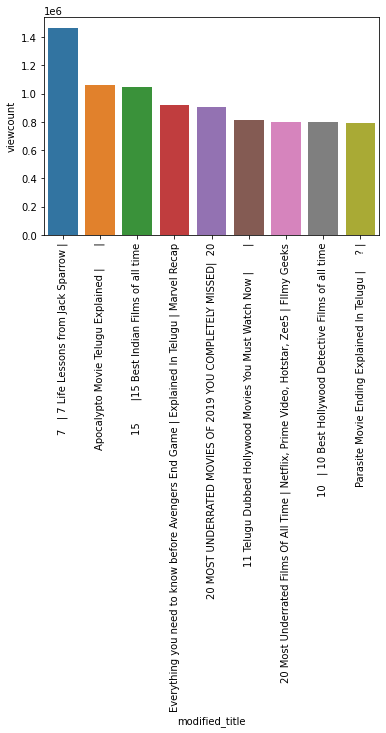

In [ ]:
ax= sns.barplot(x='modified_title',y='viewcount',data= df.sort_values('viewcount',ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Worst Performing Videos

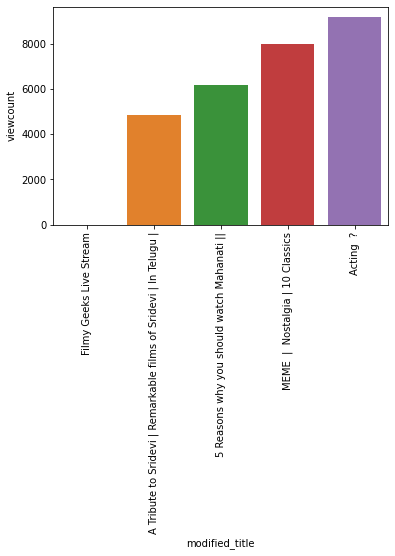

In [ ]:
ax= sns.barplot(x='modified_title',y='viewcount',data= df.sort_values('viewcount',ascending=True)[0:5])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

View Distribution per Video

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


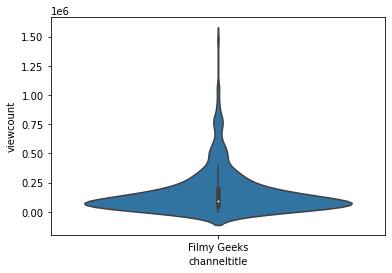

In [ ]:
sns.violinplot(video_df['channeltitle'], df['viewcount'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


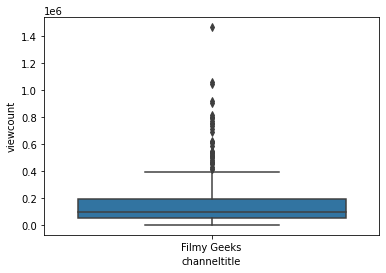

In [ ]:
sns.boxplot(video_df['channeltitle'], df['viewcount'])

Views vs. likes & comments

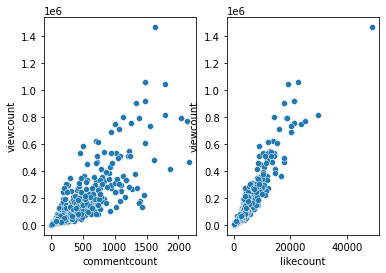

In [ ]:
fig, ax= plt.subplots(1,2)
sns.scatterplot(data=df, x='commentcount',y='viewcount',ax=ax[0])
sns.scatterplot(data=df, x='likecount',y='viewcount',ax=ax[1])

No of tags vs Views

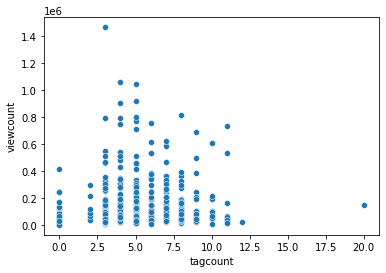

In [ ]:
sns.scatterplot(data = df, x = "tagcount", y = "viewcount")

Video Duration

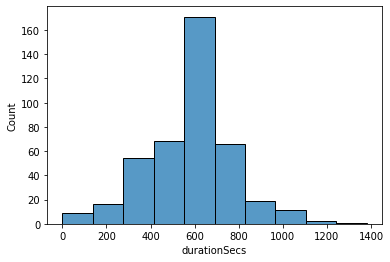

In [ ]:
sns.histplot(data=df, x='durationSecs',bins=10)


Longest Video

In [ ]:
max(df['durationSecs'])

1381.0

In [ ]:
df[df.durationSecs==max(df['durationSecs'])]['title']

203    తెలుగు సినిమా స్థాయి ని పెంచిన 20 ICONIC SHOTS...
Name: title, dtype: object

Upload Schedule

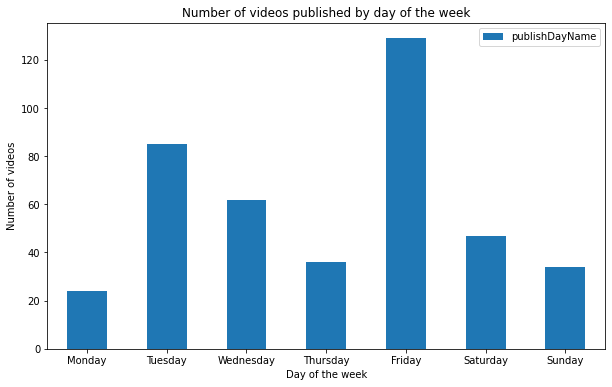

In [ ]:
day_df = pd.DataFrame(df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)

fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', rot=0, ax=ax)
ax.set_xlabel('Day of the week')
ax.set_ylabel('Number of videos')
ax.set_title('Number of videos published by day of the week')
plt.show()


Mostly used words in comment sections

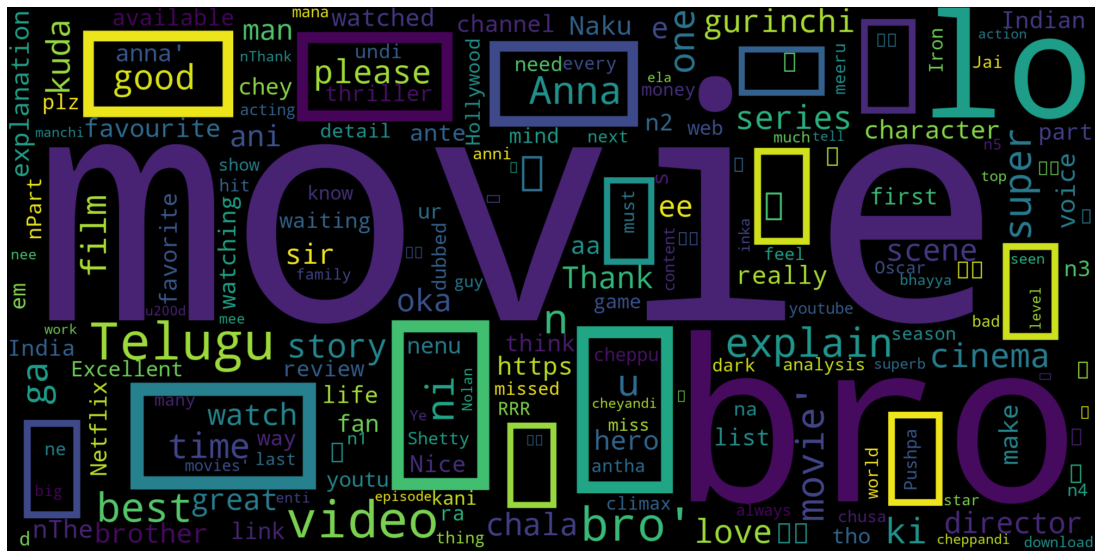

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)
wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', colormap='viridis', collocations=False).generate(all_words_str)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
